[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tVHpVjgeWqm0b2PnuTDApty09xuVNXza?usp=sharing)

# **Week 5 - Introduction to Gaussian Processes**

## **Abstract**

1. **Understanding Gaussian Processes in Regression**: The Gaussian Process uses predictions that are made by averaging over all possible functions according to their posterior probabilities. Using Prediction Distribution, Mean Function, and the Covariance function.

2. **Introduction to Kernels**: A kernel is a function used to compute the similarity or "closeness" between data points in a high-dimensional space. It encodes our assumptions about the function. Common choices include the Radial Basis Function (RBF) kernel.

3. **Fitting the Gaussian Processes to N-N**: Applying the Gaussian Processes and a Radial Basis Function (RBF) kernel to fit a Potential Energy Surface (PES) to N-N.



>## **References: Essential Resources for Further Learning**
>
>- **Gaussian Processes**: [Official Documentation](https://scikit-learn.org/stable/modules/gaussian_process.html)
- **A Visual Exploration of Gaussian Processes**: [Online Course](https://distill.pub/2019/visual-exploration-gaussian-processes/)
- **A tutorial on Gaussian process regression: Modelling, exploring, and exploiting unknown functions**: [Journal Article](https://www.biorxiv.org/content/10.1101/095190v3)
- **Assessing Gaussian Process Regression To Represent High-Dimensional Potential Energy Surfaces**: [Research Paper](https://pubs.acs.org/doi/10.1021/acs.jctc.8b00298)



Feel free to explore these resources to deepen your understanding of data visualization, data management, and computational tools in Chemistry.





In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## **Gaussian Processes in Regression**

Building off Bayes' Theorem in Regression, the Gaussian Processes in Regression

- **Gaussian Process Definition**:
  - A Gaussian Process (GP) is a collection of random variables, any finite number of which have a joint Gaussian distribution. In the context of regression, a GP can be used to define a distribution over functions.
  - A GP is fully specified by its mean function, $\ m(x) $, and covariance function, $\ k(x, x') $, such that:
  
    $$
    \ f(x) \sim \{GP}(m(x), k(x, x'))
    $$
  - Where:
    - $f(x)$ is a random function that is distributed according to the Gaussian process.
    - $m(x)$ is the mean function, often assumed to be zero in the absence of prior knowledge.
    - $k(x, x')$ is the covariance function, also known as the kernel, which defines the shape of the function space and the smoothness of the functions.

<br>

![Gaussian Process Regression Visualization](https://simple-complexities.github.io/assets/images/gaussian_process_regression.gif) <br>
[**Figure 1 - Gaussian Process Regression Visualization. Image by Ameya Daigavane**](https://simple-complexities.github.io/optimization/gaussian/processes/bayesian/2020/03/16/gaussian-processes.html)

<br>

### **Applying Gaussian Processes to Regression**

In applying GP to regression, we follow these steps:

- **Function Space Perspective**:
  - Instead of finding the best parameters for a specific function (as in polynomial regression), GP regression considers a space of possible functions that could explain the data.
  - The GP prior expresses our belief about the space of functions before observing any data.

- **Incorporating Observations**:
  - Upon observing data, the GP posterior is updated to reflect the likelihood of these functions given the observed data.
  - This update is done using the kernel to measure similarities between points, thus encoding our assumptions about the function's smoothness and variability.

- **Prediction and Uncertainty**:
  - Predictions are made by averaging over all possible functions according to their posterior probabilities. This results in not just a single prediction for each test point but also a measure of uncertainty (typically given by the variance of the predictive distribution).

- **Flexibility of Kernels**:
  - The choice of kernel is crucial in GP regression. It encodes our assumptions about the function. Common choices include the Radial Basis Function (RBF) kernel for smooth functions, the Matérn kernel for rough functions, and periodic kernels for repeating patterns.


## **Potential Energy Surface (PES)**

A **Potential Energy Surface** **(PES)** is a multidimensional surface that represents the energy of a system, typically of a molecule, as a function of the positions of its nuclei. It is crucial for understanding molecular dynamics and reactions, as it depicts how the potential energy changes with the molecular geometry and guiding the pathways of chemical transformations.

<br>

![Potential Energy Surface (PES) Visualization](https://www.researchgate.net/profile/Stanislaw-Waclawek/publication/351126865/figure/fig1/AS:1017564494848001@1619617689779/a-Model-potential-energy-surface-showing-an-example-of-a-reaction-path-minima-and.jpg) <br>
[**Figure 2 - Potential Energy Surface (PES) Visualization. Image by Stanisław Wacławek**](https://www.researchgate.net/figure/a-Model-potential-energy-surface-showing-an-example-of-a-reaction-path-minima-and_fig1_351126865)

<br>

> For this example, we'll focus on **N-N**, and its PES.

```python
from pyscf import gto, scf, mcscf, dft
import numpy as np

def get_energy(r):
  # r  is the N-N distance in the z-axis
  mol = gto.M(atom='N 0 0 0; N 0 0 %.3f'%(r), basis='6-311g')
  mf = dft.RKS(mol, xc="b3lyp").density_fit().run()
  energy = mf.kernel()
  return energy
```

> The data was collected and stored using this code snippet.

,R,Energy
0,0.500000,-103.911369
1,0.520202,-104.619753
2,0.540404,-105.244397
3,0.560606,-105.820082
4,0.580808,-106.300665
...,...,...
95,2.419192,-108.947723
96,2.439394,-108.943596
97,2.459596,-108.939373
98,2.479798,-108.935455


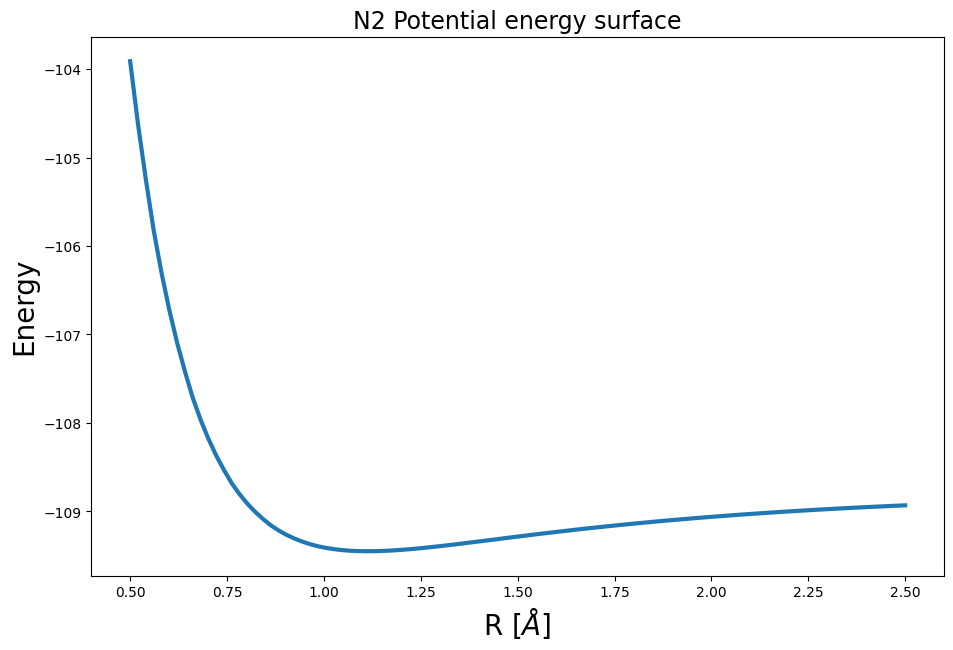

In [7]:
data_url = "https://github.com/RodrigoAVargasHdz/CHEM-4PB3/raw/main/Course_Notes/data/PES_N2"
data = pd.read_csv(data_url)

plt.figure(figsize=(11,7))
plt.plot(data['R'], data['Energy'],lw=3.)
plt.title('N2 Potential energy surface',fontsize=17)
plt.xlabel(r'R [$\AA$]',fontsize=20)
plt.ylabel('Energy',fontsize=20)

data

### **Gaussian Process Regression Formulas**

In Gaussian Process (GP) regression, we model the predictions for new inputs as a normal distribution with mean and variance given by the following formulas:

1. **Prediction Distribution**:
   The predicted outputs for new input data points are assumed to follow a normal distribution, denoted as $ y_* $.
   $$ y_* \sim \ N (\mu(X_*), \sigma(X_*)) $$

2. **Mean Function $\mu(X_*)$**:
   This function represents the expected value of the predictions for the new input points.
   $$ \mu(X_*) = k(X_*, X)^T [K(X, X) + \sigma_n^2I]^{-1}y $$

3. **Covariance Function $\sigma(X_*)$**:
   This function denotes the uncertainty or variance in the predictions for the new input points.
   $$ \sigma(X_*) = k(X_*, X_*) - k(X_*, X)^T [K(X, X) + \sigma_n^2I]^{-1}k(X_*, X) $$

- Here, $k(X_*, X)$ is the kernel function evaluated between the new input points $X_*$ and the training input points $X$, capturing the covariance between them.
- $K(X, X)$ is the kernel matrix evaluated on the training input points, representing the covariance among the training points themselves.
- $\sigma_n^2$ is the variance of the noise in the data, and $I$ is the identity matrix.
- $y$ is the vector of observed target values from the training set.

The GP model thus provides a distribution over possible functions that fit the observed data, and we use this distribution to make predictions with associated uncertainties.


![Visualizing GP over Time](https://raw.githubusercontent.com/jwangjie/Gaussian-Process-be-comfortable-using-it/master/img/gpr_animation_wide.gif) <br>
[**Figure 3 - Visualizing the Gaussian Process. Image by Jie Wang**](https://paperswithcode.com/paper/an-intuitive-tutorial-to-gaussian-processes)


### **Introduction to Kernels in Machine Learning**

A **kernel** is a function used to compute the **similarity or "closeness"** between data points in a **high-dimensional space**. Kernels are a fundamental component in various algorithms, such as Gaussian Processes (GPs). They allow us to measure similarities in input space without explicitly mapping data to a high-dimensional feature space.

1. **Kernel Definition**:
   A kernel function, typically denoted as \( k(x, x') \), takes two input vectors $x$ and \( x' \) and returns a scalar representing the similarity between them.
   $$ k(x, x') : \ X \times \ X \rightarrow \mathbb{R} $$

2. **Kernel Properties**:
   - **Symmetry**: $$k(x, x') = k(x', x)$$


3. **Common Kernels**:
   - **Linear Kernel**: Measures the linear correlation between data points.
   $$ k(x, x') = x^T x' $$
   - **Polynomial Kernel**: Introduces polynomial nonlinearity into the similarity computation.
   $$ k(x, x') = (x^T x' + c)^d $$
   - **Radial Basis Function (RBF) or Gaussian Kernel**: Measures similarity based on the distance between points in a Gaussian distribution manner.
   $$ k_{\text{RBF}}(x_i, x_j) = \exp \left( -\frac{(x_i - x_j)^2}{2\ell^2} \right) $$

Kernels allow us to apply algorithms effectively in a high-dimensional space without incurring the computational cost of actually working in that space, a concept known as the "kernel trick". This makes them a powerful tool for non-linear classification and regression tasks.

<br>

![Kernel Function Visualization](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif) <br>
[**Figure 4 - Kernel Function Visualization. Image by Michael Plotke**](https://en.wikipedia.org/wiki/Convolution#/media/File:2D_Convolution_Animation.gif)

![Performing the convolution operation on 1D discrete signal.](https://miro.medium.com/v2/resize:fit:1280/format:webp/0*EvaGtBrfLicPUVY5.gif) <br>
[**Figure 5 - Performing the convolution operation on 1D discrete signal. Image by Brandon Rohrer**](https://e2eml.school/convolution_one_d.html)

<br>

## **Fitting a Gaussian Process on an N-N Potential Energy Surface (PES)**

> Using the Gaussian Process and Radial Basis Function (RBF), let's create a PES for N-N.

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, DotProduct,\
    RBF, WhiteKernel, Matern, ExpSineSquared
from sklearn.model_selection import train_test_split

In [9]:
# select random data
X,y = data['R'].to_numpy(), data['Energy'].to_numpy()
X = X[:,np.newaxis] #(N,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=1)

Text(0, 0.5, 'Energy')

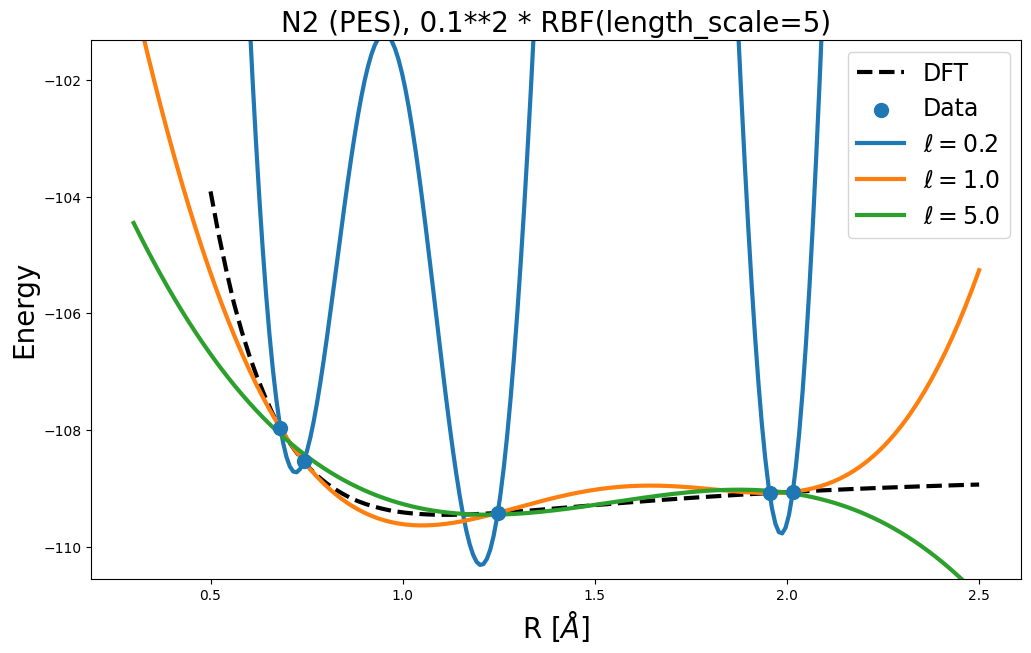

In [11]:
# GP
x_grid = np.linspace(0.3,2.5,250)[:,np.newaxis]

plt.figure(figsize=(12,7))
plt.plot(X, y,ls='--',c='k',lw=3.,label = 'DFT')
plt.scatter(X_train,y_train,marker='o',\
            c='tab:blue',s=100,label='Data',zorder=3.5)

l = np.array([0.25, 1., 5.])
for li in l:
    kernel = 0.01 * \
        RBF(length_scale=li, length_scale_bounds=(1E-3, 1E2))
    model = GaussianProcessRegressor(kernel=kernel, optimizer=None)
    model.fit(X_train, y_train)
    y_pred = model.predict(x_grid)
    plt.plot(x_grid, y_pred, lw=3.,\
        label=r'$\ell = %.1f$' % li)

plt.ylim(np.min(y)*1.01, np.max(y)*0.975)
plt.legend(fontsize=17)
plt.title('N2 (PES), %s'%model.kernel_, fontsize=20)
plt.xlabel(r'R [$\AA$]', fontsize=20)
plt.ylabel('Energy', fontsize=20)

From the figure above we can observe that for the RBF kernel, the length-scale parameter $\ell$ is fundamental in the accuracy.

$$ k_{\text{RBF}}(x_i, x_j) = \exp \left( -\frac{(x_i - x_j)^2}{2\ell^2} \right) $$

$\ell$ dictates how quickly the similarity measure decays with distance. The larger $\ell$ is, the smoother the function will be. Conversely, a small $\ell$ leads to a function that reacts more sensitively to the training data, which can capture more detail but might also lead to overfitting.





### **Marginal Likelihood**

The **marginal likelihood** is given by the equation:

$$
\log p(\mathbf{y}|\mathbf{X}) = -\frac{1}{2} \mathbf{y}^T (K + \sigma_n^2 I)^{-1} \mathbf{y} - \frac{1}{2} \log |K + \sigma_n^2 I| - \frac{N}{2} \log(2\pi)
$$

- It represents the probability of generating the observed sample from a prior and is therefore often referred to as **model evidence** or simply evidence.

<br>

#### **Kernel Function**

Let's consider the following kernel:

$$
k_{\text{RBF}}(x_i, x_j) = c \exp \left( -\frac{(x_i - x_j)^2}{2\ell^2} \right)
$$


> By changing the values of the constant $(C)$ the kernel can be scaled. In Gaussian Process Regression, the log marginal likelihood is used as a measure of model fit; higher values indicate a better-fitting model.

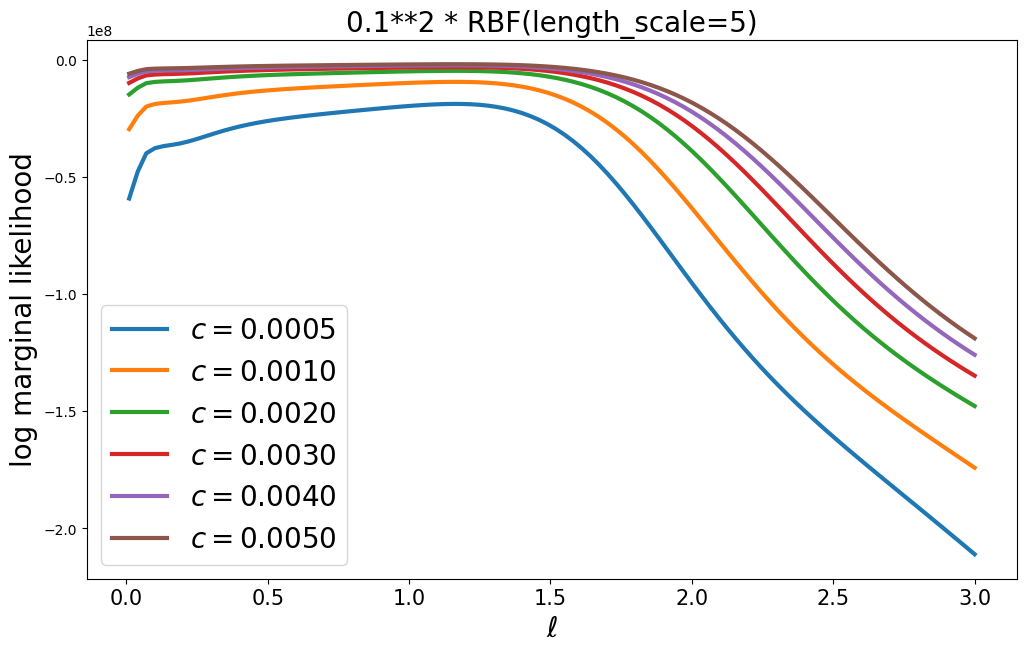

In [13]:
def get_mll_curve(c):
    l_ = np.linspace(0.01,3.,100) # grid over lenght-scale parameter
    mll_ = []

    for li in l_:
        kernel = c * \
            RBF(length_scale=li, length_scale_bounds=(1E-3, 1E2))
        model = GaussianProcessRegressor(kernel=kernel, optimizer=None)
        model.fit(X_train, y_train)
        mll = model.log_marginal_likelihood()
        mll_.append(mll)
    return np.array(mll_), l_

# grid over the c-parameter
c = np.array([0.0005,0.001,0.002,0.003,0.004,0.005])

plt.figure(figsize=(12, 7))
for ci in c:
    mll_, l_ = get_mll_curve(ci)
    plt.plot(l_,mll_,label=r'$c = %.4f$'%ci,lw=3.)

plt.title('%s' % model.kernel_, fontsize=20)
plt.xlabel(r'$\ell$', fontsize=20)
plt.ylabel('log marginal likelihood', fontsize=20)
plt.xticks(fontsize=15)
plt.legend(fontsize=20)

> By observing the peak of each curve, we can deduce the optimal length-scale parameter for each value of **$C$**. This is part of the **hyperparameter tuning** process to find the best settings for the Gaussian Process model to fit the training data.

In [14]:
#Optimal value of the parameters

kernel = ConstantKernel(1.) * \
    RBF(length_scale=1., length_scale_bounds=(1E-3, 1E2))
model = GaussianProcessRegressor(kernel=kernel)
model.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1))

### **Homework - Fitting a Gaussian Process on an ${H}_2O$ Potential Energy Surface (PES)**

>## **Resources**
>
>- **PyScf**: [Official Documentation](https://pyscf.org/user.html)
- **Assessing Gaussian Process Regression To Represent High-Dimensional Potential Energy Surfaces**: [Research Paper](https://pubs.acs.org/doi/10.1021/acs.jctc.8b00298)
- **A tutorial on Gaussian process regression: Modelling, exploring, and exploiting unknown functions**: [Journal Article](https://www.biorxiv.org/content/10.1101/095190v3)

In [ ]:
# Your Code Here